<a href="https://colab.research.google.com/github/sebas-svg/pdsei-2023-sebastian-sanchez/blob/main/Codigo_Tarea_Semana1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOLA

In [24]:
# Descarga el archivo de audio desde GitHub
!wget https://github.com/sebas-svg/pdsei-2023-sebastian-sanchez/raw/main/ardillas-cantando.wav -O ardillas-cantando.wav

# Reproduce el archivo de audio
from IPython.display import Audio
audio_path = "ardillas-cantando.wav"
Audio(audio_path)







--2023-09-11 15:26:53--  https://github.com/sebas-svg/pdsei-2023-sebastian-sanchez/raw/main/ardillas-cantando.wav
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sebas-svg/pdsei-2023-sebastian-sanchez/main/ardillas-cantando.wav [following]
--2023-09-11 15:26:53--  https://raw.githubusercontent.com/sebas-svg/pdsei-2023-sebastian-sanchez/main/ardillas-cantando.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1599080 (1.5M) [audio/wav]
Saving to: ‘ardillas-cantando.wav’

ardillas-cantando.w 100%[===================>]   1.52M  8.04MB/s    in 0.2s    

2023-09-11 15:26:53 (8.04 MB/s) - ‘ardillas

Tasa de muestreo: 44100 muestras/segundo
Tamaño de la señal: 399744 muestras
Duración: 9.064 segundos
202000.02267573698
160000.02267573698


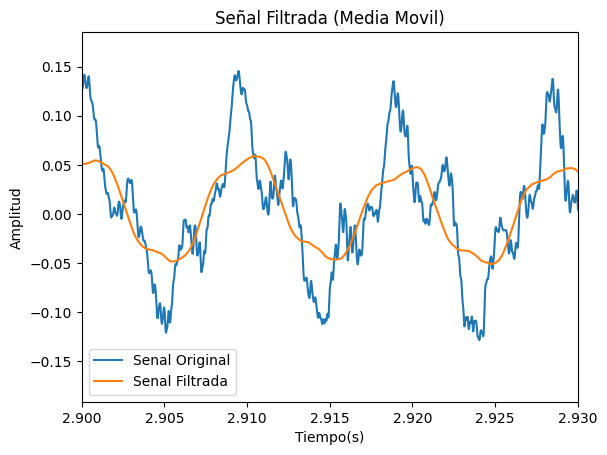

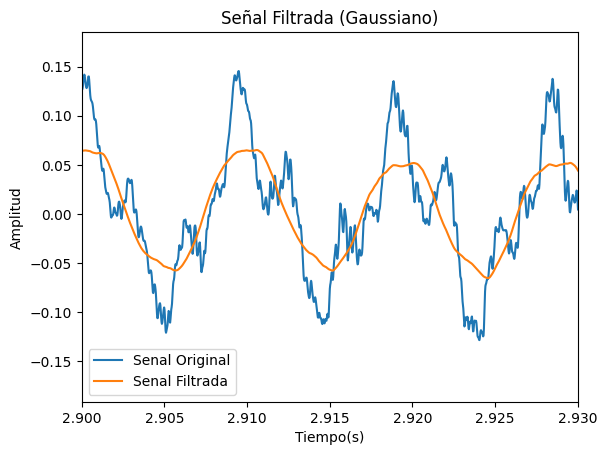

In [25]:
import soundfile
import matplotlib.pyplot as plt
import numpy as np

audio_signal, fm = soundfile.read("ardillas-cantando.wav")

t= np.arange(0, 9.06447, 1/fm) # variable independiente discreta

dimension_t=len(t)

audio_izquierdo=audio_signal[:, 0]

type(audio_signal)

print("Tasa de muestreo: {} muestras/segundo" .format(fm))
print("Tamaño de la señal: {} muestras" .format(audio_izquierdo.shape[0]))
print("Duración: {:.3f} segundos" .format(audio_izquierdo.shape[0]/fm))
plt.plot(t,audio_izquierdo)

k=101
signal_filtrada=np.zeros_like(audio_izquierdo)

for i in range(k,dimension_t-k+1):
  signal_filtrada[i]=np.mean(audio_izquierdo[i-k:i+k])

size_ventana=1000*(2*k+1/fm)
print(size_ventana)
plt.plot(t,signal_filtrada)
plt.title("Señal Filtrada (Media Movil)")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.legend(["Senal Original","Senal Filtrada"])
plt.xlim(2.9,2.930)

soundfile.write("filtrado.wav", signal_filtrada,fm)

FWHM=25
k=80

gauss_t=1000*np.arange(-k,k)/fm

filtro_gaussiano=np.exp(-4*(np.log(2)*gauss_t**2)/FWHM**2)
filtro_gaussiano_normalizado=filtro_gaussiano/np.sum(filtro_gaussiano)

signal_filtradag=np.zeros_like(audio_izquierdo)

for i in range(k,dimension_t-k+1):
  signal_filtradag[i]=np.sum(audio_izquierdo[i-k:i+k]*filtro_gaussiano_normalizado)

size_ventana=1000*(2*k+1/fm)
print(size_ventana)
plt.figure()
plt.plot(t,audio_izquierdo)
plt.plot(t,signal_filtradag)
plt.title("Señal Filtrada (Gaussiano)")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.legend(["Senal Original","Senal Filtrada"])
plt.xlim(2.9,2.930)
plt.show()

soundfile.write("filtradog.wav", signal_filtradag,fm)